In [ ]:
import pandas as pd
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
input = df.drop(["Survived"], axis = 1)
input

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [ ]:
target = df["Survived"]
target


,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
input["Embarked"].fillna(input["Embarked"].ffill(), inplace = True)

/tmp/ipython-input-1004917691.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  input["Embarked"].fillna(input["Embarked"].ffill(), inplace = True)


In [ ]:
input["Age"].fillna(input["Age"].median(), inplace = True)


/tmp/ipython-input-2204648363.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  input["Age"].fillna(input["Age"].median(), inplace = True)


In [ ]:
input.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le_Pclass = LabelEncoder()
le_Sex = LabelEncoder()
le_Age = LabelEncoder()
le_SibSp = LabelEncoder()
le_Parch = LabelEncoder()
le_Fare = LabelEncoder()
le_Embarked	 = LabelEncoder()

In [ ]:
input["Pclass_n"] = le_Pclass.fit_transform(input["Pclass"])
input["Sex_n"] = le_Sex.fit_transform(input["Sex"])
input["Age_n"] = le_Age.fit_transform(input["Age"])
input["SibSp_n"] = le_SibSp.fit_transform(input["SibSp"])
input["Parch_n"] = le_Parch.fit_transform(input["Parch"])
input["Fare_n"] = le_Fare.fit_transform(input["Fare"])
input["Embarked_n"] = le_Embarked.fit_transform(input["Embarked"])

In [ ]:
input = input[["Pclass_n", "Sex_n", "Age_n", "SibSp_n", "Parch_n", "Fare_n", "Embarked_n"]]
input

,Pclass_n,Sex_n,Age_n,SibSp_n,Parch_n,Fare_n,Embarked_n
0,2,1,28,1,0,18,2
1,0,0,51,1,0,207,0
2,2,0,34,0,0,41,2
3,0,0,47,1,0,189,2
4,2,1,47,0,0,43,2
...,...,...,...,...,...,...,...
886,1,1,35,0,0,85,2
887,0,0,24,0,0,153,2
888,2,0,36,1,2,131,2
889,0,1,34,0,0,153,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size = 0.2)

In [ ]:
from sklearn.ensemble  import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
model_train = model.predict(X_train)
from sklearn.metrics import accuracy_score
train_score = accuracy_score(model_train, y_train)
print(f"THE TRAINING DATA SCORE IS {train_score*100}%")

THE TRAINING DATA SCORE IS 98.73595505617978%


In [ ]:
model_test = model.predict(X_test)
test_score = accuracy_score(model_test, y_test)
print(f"THE TESTING DATA SCORE IS {train_score*100}%")

THE TESTING DATA SCORE IS 98.73595505617978%


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model_test))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       117
           1       0.68      0.73      0.70        62

    accuracy                           0.79       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



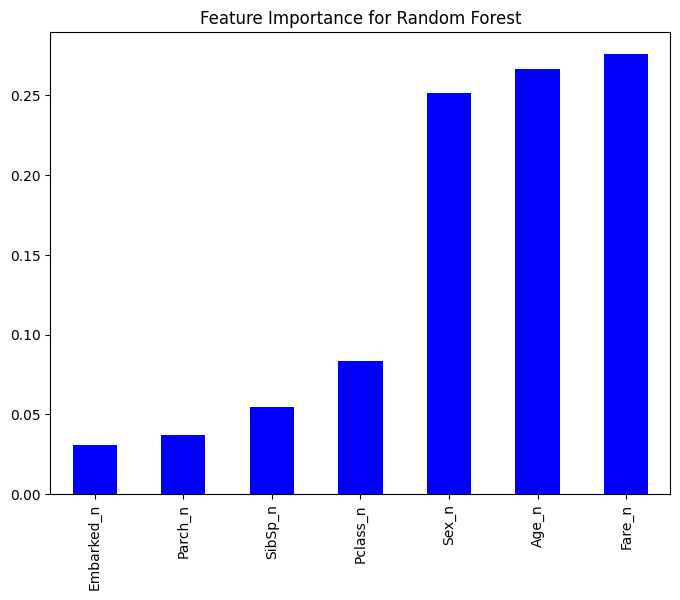

In [ ]:
import matplotlib.pyplot as plt

imp = pd.Series(model.feature_importances_, index=input.columns)
imp.sort_values().plot(kind="bar", figsize=(8,6), color = "blue")
plt.title("Feature Importance for Random Forest")
plt.show()

In [ ]:
DT = model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

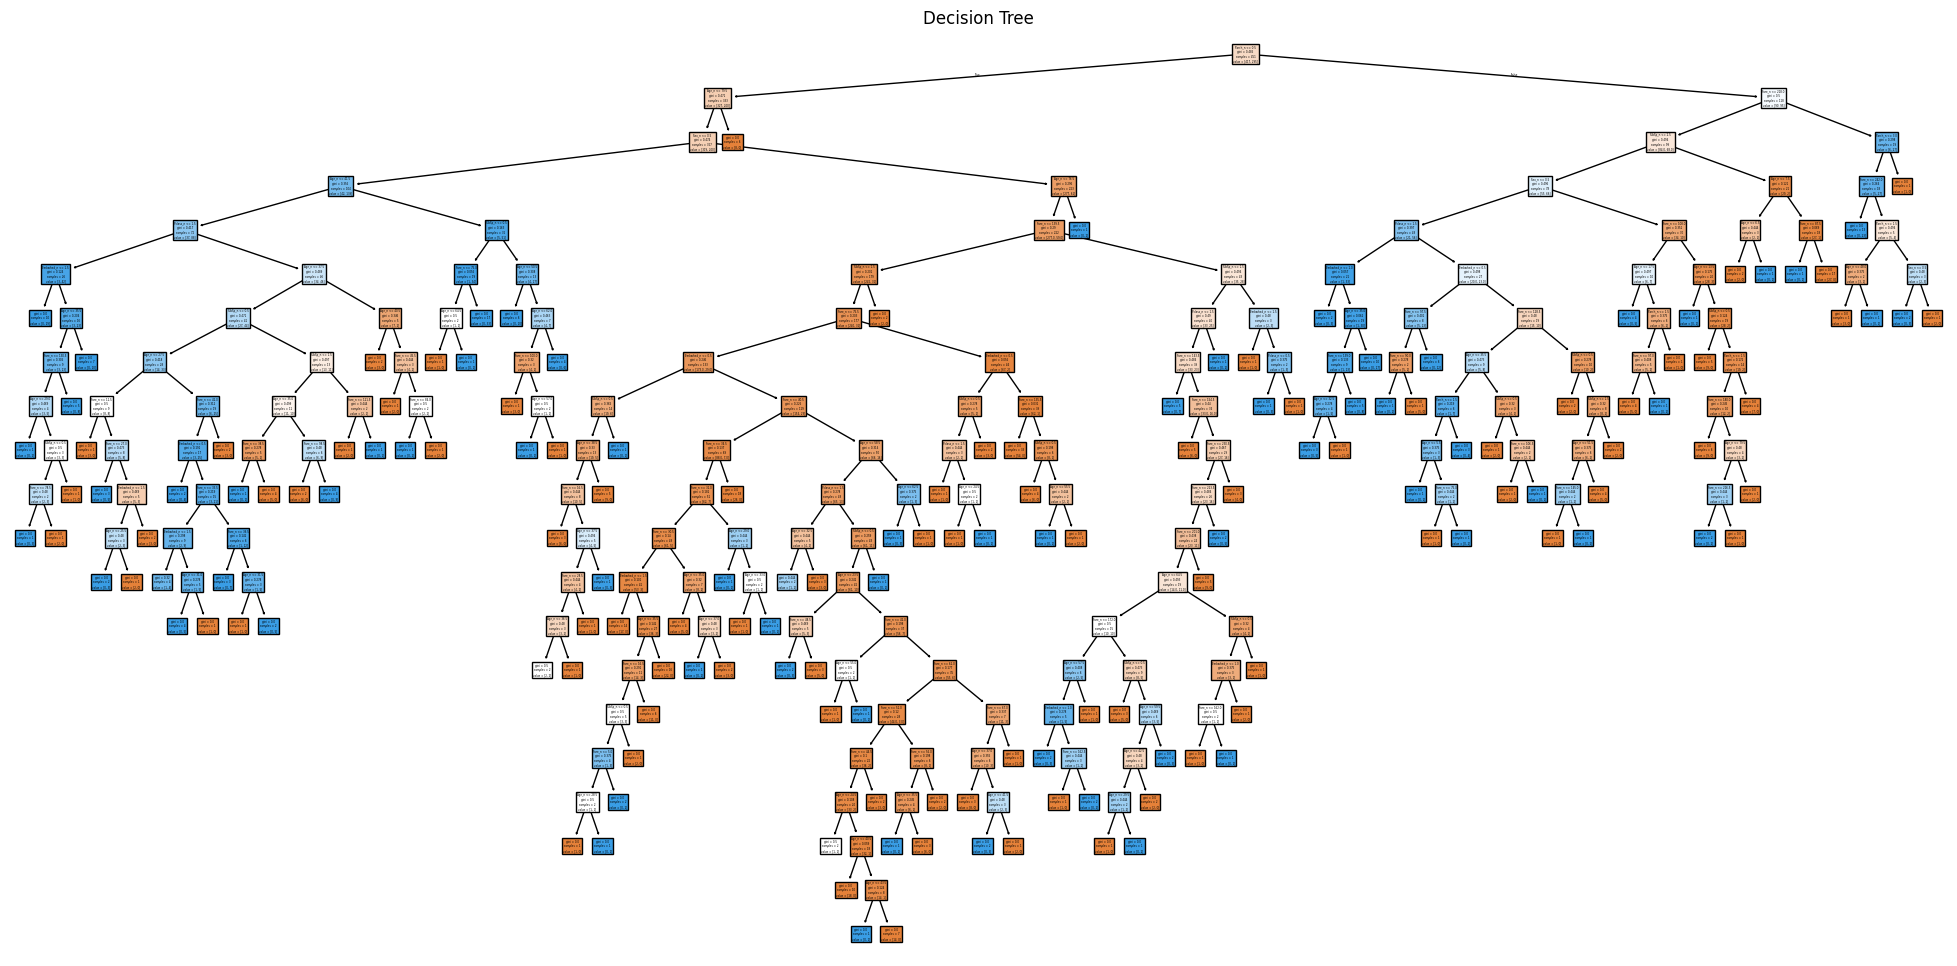

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25, 12))
plot_tree(DT, feature_names=input.columns, filled=True)
plt.title("Decision Tree")
plt.show()